# Covid-19 in the Philippines

Data as of June 18, 2022

Source: DOH Data Drop

Metadata: https://docs.google.com/spreadsheets/d/1rD77PMdxN6JMVeYmk7mvgDNtEHJt8Du6ozaLm_Qok0Q/edit#gid=1714687638

Download the CSV files from the DOH Data Drop and save them within the PATH. We'll start by combining the four CSVs into one data frame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)
df = pd.concat(
    map(pd.read_csv, ['DOH COVID Data Drop_ 20220618 - 04 Case Information_batch_0.csv', 'DOH COVID Data Drop_ 20220618 - 04 Case Information_batch_1.csv', 'DOH COVID Data Drop_ 20220618 - 04 Case Information_batch_2.csv', "DOH COVID Data Drop_ 20220618 - 04 Case Information_batch_3.csv"]), ignore_index=True)
df

/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_13381/2341307899.py:3: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.


,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,Admitted,RegionRes,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C404174,38.0,35 to 39,FEMALE,NaN,2020-01-30,2020-01-30,NaN,NaN,RECOVERED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,"Health Status is ""Recovered"", but no Date Reco..."
1,C462688,44.0,40 to 44,MALE,NaN,2020-01-30,2020-02-03,2020-02-01,NaN,DIED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,DIED,NO,2020-01-18,NaN,NaN
2,C387710,60.0,60 to 64,FEMALE,2020-01-23,2020-01-30,2020-02-05,NaN,2020-01-31,RECOVERED,YES,Region VII: Central Visayas,BOHOL,PANGLAO,PH071233000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,Age or Birthdate is Invalid\nCase has Admittin...
3,C498051,63.0,60 to 64,MALE,2020-03-05,NaN,2020-03-06,2020-03-11,NaN,DIED,NO,Region IV-A: CALABARZON,RIZAL,CAINTA,PH045805000,NaN,NaN,DIED,NO,NaN,NaN,"Case has Lab Result, but Result Date is blank\..."
4,C377460,49.0,45 to 49,MALE,NaN,NaN,2020-03-06,NaN,NaN,RECOVERED,YES,Region IV-A: CALABARZON,BATANGAS,SANTO TOMAS,PH041028000,NaN,NaN,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695647,C50113400,29.0,25 to 29,FEMALE,2022-06-15,2022-06-16,2022-06-18,NaN,NaN,NaN,NaN,NCR,NCR,CITY OF MAKATI,PH137602000,BEL-AIR,PH137602002,MILD,NO,NaN,NO,NaN
3695648,C60205380,1.0,0 to 4,MALE,2022-06-16,2022-06-16,2022-06-18,NaN,NaN,NaN,NaN,Region II: Cagayan Valley,CAGAYAN,TUGUEGARAO CITY (CAPITAL),PH021529000,ATULAYAN SUR,PH021529039,MILD,NO,NaN,NaN,NaN
3695649,C29916557,34.0,30 to 34,MALE,2022-06-15,2022-06-16,2022-06-18,NaN,NaN,NaN,NaN,Region VI: Western Visayas,NEGROS OCCIDENTAL,CITY OF KABANKALAN,PH064515000,HILAMONAN,PH064515008,ASYMPTOMATIC,NO,NaN,NaN,NaN
3695650,C54805081,25.0,25 to 29,FEMALE,2022-06-13,2022-06-16,2022-06-18,NaN,NaN,NaN,NaN,Region IV-B: MIMAROPA,PALAWAN,BROOKE'S POINT,PH175306000,NaN,NaN,MILD,NO,NaN,NO,NaN


We basically combined all four CSVs into one file. 
You can save this single file into a CSV if you want to. 

In [3]:
df.DateRepConf = pd.to_datetime(df.DateRepConf, format="%Y-%m-%d")
df.DateDied = pd.to_datetime(df.DateDied, format="%Y-%m-%d")
df.DateRecover = pd.to_datetime(df.DateRecover, format="%Y-%m-%d")
df.DateOnset = pd.to_datetime(df.DateOnset, format="%Y-%m-%d")
df.DateResultRelease = pd.to_datetime(df.DateResultRelease, format="%Y-%m-%d")
df.DateSpecimen = pd.to_datetime(df.DateSpecimen, format="%Y-%m-%d")

In [4]:
df.dtypes
#This checks whether we successfully converted the columns above into datetime.

CaseCode                     object
Age                         float64
AgeGroup                     object
Sex                          object
DateSpecimen         datetime64[ns]
DateResultRelease    datetime64[ns]
DateRepConf          datetime64[ns]
DateDied             datetime64[ns]
DateRecover          datetime64[ns]
RemovalType                  object
Admitted                     object
RegionRes                    object
ProvRes                      object
CityMunRes                   object
CityMuniPSGC                 object
BarangayRes                  object
BarangayPSGC                 object
HealthStatus                 object
Quarantined                  object
DateOnset            datetime64[ns]
Pregnanttab                  object
ValidationStatus             object
dtype: object

In [5]:
df['CityMunRes'] = df['CityMunRes'].str.title()
df['ProvRes'] = df['ProvRes'].str.title()

# Cleaning the data

## Looking for duplicates

Look for potential duplicates through the all columns. **True** means there are duplicates **across all columns.**

In [6]:
df.duplicated().value_counts()

False    3695652
dtype: int64

**No duplicated records** found in the report.

DOH, in its daily case reports, continuously clean the data and regularly reports and removes duplicates.

In the meantime, we will be **keeping the duplicates** for the purpose of our analysis. We are confident that because duplicates account for less than 1% of the total, it won't affect the overall Covid-19 picture.

In [7]:
#df[df.duplicated(keep='first')].sort_values('Age')
#This supposedly shows the duplicated entries arranged by 'Age'. Remember, these entries are checked similar
#across all columns in at least another entry. They are just arranged by age.

## Handling NaN values

There are also issues with **NaNs** which means there was no data input. One issue I stumbled upon quite belatedly was the fact that **'CaseCode'** indicator actually has a lot of null values (see below).

In [8]:
df.CaseCode.isna().value_counts()

False    3695651
True           1
Name: CaseCode, dtype: int64

One NaN detected as of this latest update. This means we can easily **resample** the cases (with the lone NaN not being included).

Previously though, there were over **60,000** null values under **CaseCode** which prompted us to use other columns (**Sex**) to analyze. Below we see however that the Sex column now has more NaNs.

In [9]:
df.Sex.isna().value_counts()

False    3695609
True          43
Name: Sex, dtype: int64

# Case data

Note: Just remove **.tail()** to get all dates here. **.tail()** shows the last entries while the number inside paranthesis signify how many last entries are shown. Default shows last 10 entries. Alternatively: **.head()**

## DateRepConf

Pertains to data when cases are publicly reported **(this is what is closely followed and reported in the media).** Caveat is this can include case positives from previous days because of delays in test processing and reporting.

For instance, cases may be reported on January 2, but based on testing data on December 31.

Furthemore, data from previous days may be subject to change as DOH said it is constantly reviewing the reports' veracity and removing some potential duplicates.

In [10]:
cases = df.resample('D', on='DateRepConf').CaseCode.count().to_frame().reset_index()
cases.tail()

,DateRepConf,CaseCode
866,2022-06-14,252
867,2022-06-15,256
868,2022-06-16,425
869,2022-06-17,539
870,2022-06-18,585


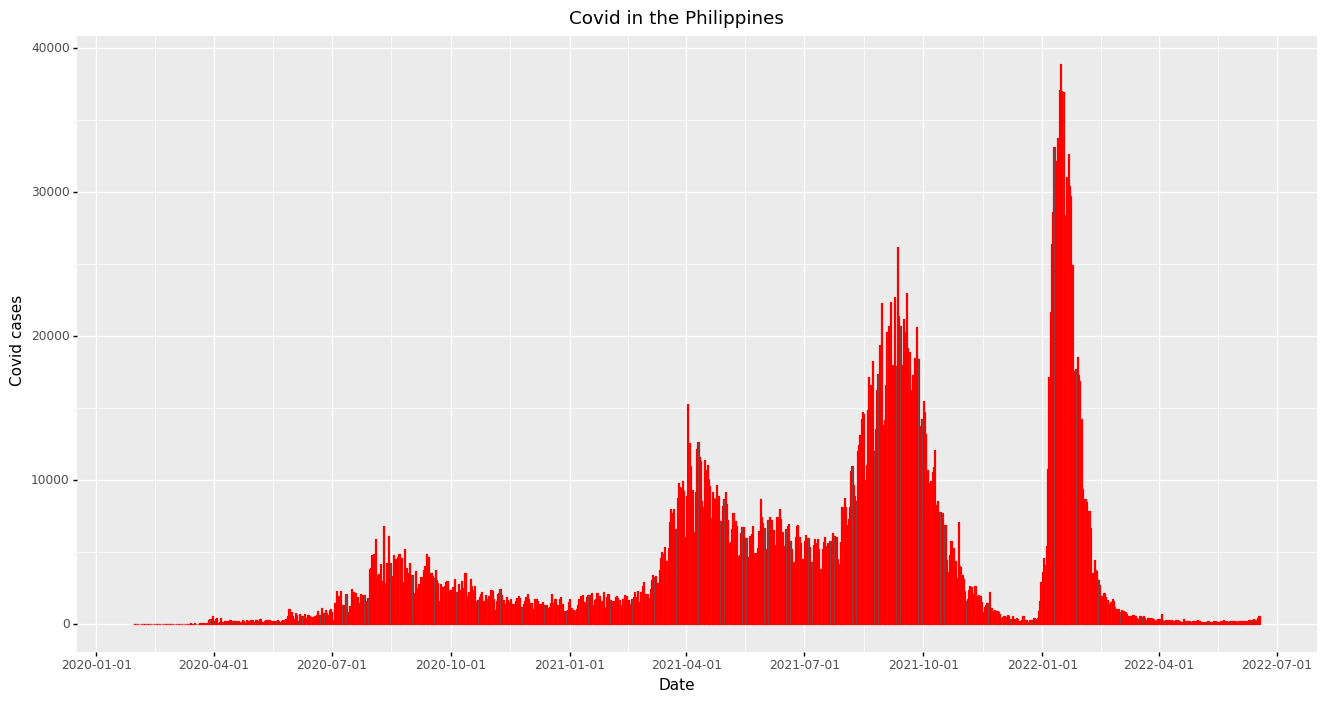

<ggplot: (322808676)>

In [11]:
(
    ggplot(cases, aes('DateRepConf', 'CaseCode')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)

# Two week rolling case average

You can change the time frame of the rolling average by changing the number of **days** inside the paranthesis after **rolling.**

In [12]:
df.resample('D', on='DateRepConf').CaseCode.count().rolling(14).mean().round().tail(20)

DateRepConf
2022-05-30    183.0
2022-05-31    185.0
2022-06-01    186.0
2022-06-02    185.0
2022-06-03    186.0
2022-06-04    184.0
2022-06-05    186.0
2022-06-06    185.0
2022-06-07    187.0
2022-06-08    188.0
2022-06-09    192.0
2022-06-10    197.0
2022-06-11    204.0
2022-06-12    212.0
2022-06-13    225.0
2022-06-14    234.0
2022-06-15    243.0
2022-06-16    260.0
2022-06-17    283.0
2022-06-18    310.0
Freq: D, Name: CaseCode, dtype: float64

In [13]:
case_roll = df.resample('D', on='DateRepConf').CaseCode.count().rolling(14).mean().to_frame().reset_index()
case_roll= case_roll.round(0)
case_roll

,DateRepConf,CaseCode
0,2020-01-30,NaN
1,2020-01-31,NaN
2,2020-02-01,NaN
3,2020-02-02,NaN
4,2020-02-03,NaN
5,2020-02-04,NaN
6,2020-02-05,NaN
7,2020-02-06,NaN
8,2020-02-07,NaN
9,2020-02-08,NaN


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:381: PlotnineWarning: position_stack : Removed 13 rows containing missing values.


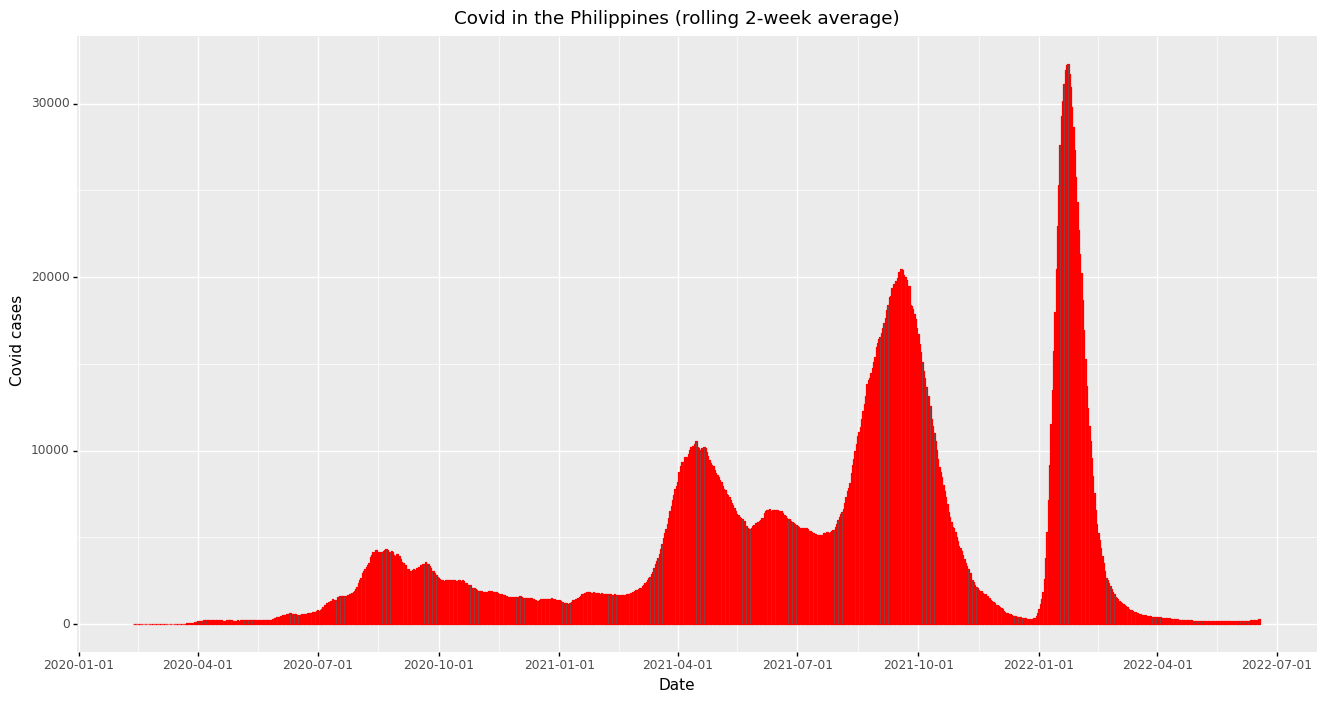

<ggplot: (322808511)>

In [14]:
(
    ggplot(case_roll, aes('DateRepConf', 'CaseCode')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines (rolling 2-week average)")
)

## DateOnset

Pertains to cases when date of illness or when symptoms manifest. Sometimes, people are not tested until cases manifest and processing of cases take time. DateOnset records cases based on when the illness first manifested, not when test results were released.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing, see below) as proxy.

In [15]:
df.resample('D', on='DateOnset').CaseCode.count().tail(10)

DateOnset
2022-06-08    44
2022-06-09    80
2022-06-10    56
2022-06-11    63
2022-06-12    66
2022-06-13    67
2022-06-14    65
2022-06-15    44
2022-06-16    23
2022-06-17     2
Name: CaseCode, dtype: int64

## DateSpecimen

Pertains to when specimen was collected from suspected case for Covid-19 testing. Data show those who tested positive after testing, but date used to report case is based on when the specimen is collected, instead of when results came out positive.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing) as proxy.

In [16]:
df.resample('D', on='DateSpecimen').CaseCode.count().tail(10)

DateSpecimen
2022-06-08    320
2022-06-09    294
2022-06-10    346
2022-06-11    306
2022-06-12    226
2022-06-13    421
2022-06-14    484
2022-06-15    374
2022-06-16    210
2022-06-17    111
Name: CaseCode, dtype: int64

## DateRecover

Pertains to date when cases recovered from Covid-19. Not used in reporting "recoveries" data every day. 

In [17]:
df[df.HealthStatus=="RECOVERED"].resample('D', on='DateRepConf').size().tail(10)

DateRepConf
2022-06-09    160
2022-06-10     33
2022-06-11      9
2022-06-12      0
2022-06-13      0
2022-06-14      0
2022-06-15      3
2022-06-16      4
2022-06-17      5
2022-06-18      6
Freq: D, dtype: int64

## DateDied

Pertains to date when cases died from Covid-19. Not used in reporting "deaths" data every day. 

In [18]:
df[df.RemovalType=="DIED"].resample('D', on='DateDied').size().tail(10)

DateDied
2022-05-29    0
2022-05-30    0
2022-05-31    0
2022-06-01    0
2022-06-02    0
2022-06-03    2
2022-06-04    0
2022-06-05    0
2022-06-06    0
2022-06-07    1
dtype: int64

Note: Clearly when used to resample, DateRecovered and DateDied columns underestimate both figures as reported. This can be due to a number of reasons, including some deaths and recoveries bearing no date.

# Which regions have the highest number of Covid-19 cases so far?

In [19]:
regions = df.RegionRes.value_counts(dropna=False)
#ROF stands for returning overseas Filipinos
#Over 3,400 (0.11%) have no indicated regional location.

Interpretation: Half of Covid-19 cases were detected in Metro Manila and Calabarzon.

# Which provinces have the highest number of Covid-19 cases so far?

In [20]:
df.ProvRes.value_counts(dropna=False).head(12)
#Over 47,000 (1.3%) have no information into provincial location.

Ncr                  1171148
Cavite                218704
Laguna                164463
Rizal                 142170
Cebu                  139994
Bulacan               136676
Batangas               93346
Davao Del Sur          89940
Pampanga               88621
Iloilo                 80379
Negros Occidental      71895
Benguet                69757
Name: ProvRes, dtype: int64

# Which municipalities?

In [21]:
df.CityMunRes.value_counts(dropna=False)
#Over 55,000 (about 1.5%) people infected have no information on their municipal location.

Quezon City                     245328
City Of Manila                  148166
City Of Pasig                    85217
Taguig City                      83932
Caloocan City                    83644
                                 ...  
Tabuan-Lasa                          4
Mapun (Cagayan De Tawi-Tawi)         3
Tapul                                3
Cotabato City <Poblacion>            3
Bumbaran                             1
Name: CityMunRes, Length: 1437, dtype: int64

Interpretation: Six cities from Metro Manila top the list of number of people infected with Covid-19. Davao City in Mindanao follow them.

# Track cases per day per province

Warning: This can be quite heavy because of the number of provinces (87) involved. But the beauty of this is you can save this df into a separate CSV (using the df name **'df_prov'**) if you'd like. 

Code also applicable to municipal, regional and barangay level. But be careful as the data get more granular as there could be some problem (see below).

### Wide data (pivot table)

In [22]:
df_prov = df.pivot_table(columns="ProvRes", index='DateRepConf', values='CaseCode', aggfunc='count', fill_value='0', dropna=False).reset_index()
df_prov.head(10)

ProvRes,DateRepConf,Abra,Agusan Del Norte,Agusan Del Sur,Aklan,Albay,Antique,Apayao,Aurora,Basilan,Bataan,Batanes,Batangas,Benguet,Biliran,Bohol,Bukidnon,Bulacan,Cagayan,Camarines Norte,Camarines Sur,Camiguin,Capiz,Catanduanes,Cavite,Cebu,City Of Isabela (Not A Province),Cotabato (North Cotabato),Cotabato City (Not A Province),Davao De Oro,Davao Del Norte,Davao Del Sur,Davao Occidental,Davao Oriental,Dinagat Islands,Eastern Samar,Guimaras,Ifugao,Ilocos Norte,Ilocos Sur,Iloilo,Isabela,Kalinga,La Union,Laguna,Lanao Del Norte,Lanao Del Sur,Leyte,Maguindanao,Marinduque,Masbate,Misamis Occidental,Misamis Oriental,Mountain Province,Ncr,Negros Occidental,Negros Oriental,Northern Samar,Nueva Ecija,Nueva Vizcaya,Occidental Mindoro,Oriental Mindoro,Palawan,Pampanga,Pangasinan,Quezon,Quirino,Rizal,Romblon,Samar (Western Samar),Sarangani,Siquijor,Sorsogon,South Cotabato,Southern Leyte,Sultan Kudarat,Sulu,Surigao Del Norte,Surigao Del Sur,Tarlac,Tawi-Tawi,Zambales,Zamboanga Del Norte,Zamboanga Del Sur,Zamboanga Sibugay
0,2020-01-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-06,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2020-03-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2020-03-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2020-03-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0
8,2020-03-11,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2020-03-12,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Wide data (total cases per province to date)

In [23]:
df_prov2 = df.pivot_table(index="ProvRes", values='CaseCode', aggfunc='count', fill_value='0', dropna=False).reset_index()
df_prov2.head(10)

,ProvRes,CaseCode
0,Abra,5937
1,Agusan Del Norte,22346
2,Agusan Del Sur,16487
3,Aklan,16244
4,Albay,13867
5,Antique,9462
6,Apayao,9335
7,Aurora,4294
8,Basilan,1765
9,Bataan,41732


In [24]:
#df_prov2.to_csv('provinces-cases.csv')

### Long data

We create a **new dataframe** for plotnine later. Long data is always preferred when processing using plotnine.

In [25]:
df_prov2 = pd.melt(df_prov, id_vars=['DateRepConf'], value_name='CaseCode', \
                   var_name='province').sort_values('province')

In [26]:
df_prov2.CaseCode = df_prov2.CaseCode.astype(int)
df_prov2

,DateRepConf,province,CaseCode
0,2020-01-30,Abra,0
552,2021-09-06,Abra,4
553,2021-09-07,Abra,133
554,2021-09-08,Abra,1
555,2021-09-09,Abra,1
...,...,...,...
69836,2020-12-10,Zamboanga Sibugay,0
69837,2020-12-11,Zamboanga Sibugay,0
69838,2020-12-12,Zamboanga Sibugay,2
69866,2021-01-09,Zamboanga Sibugay,11


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


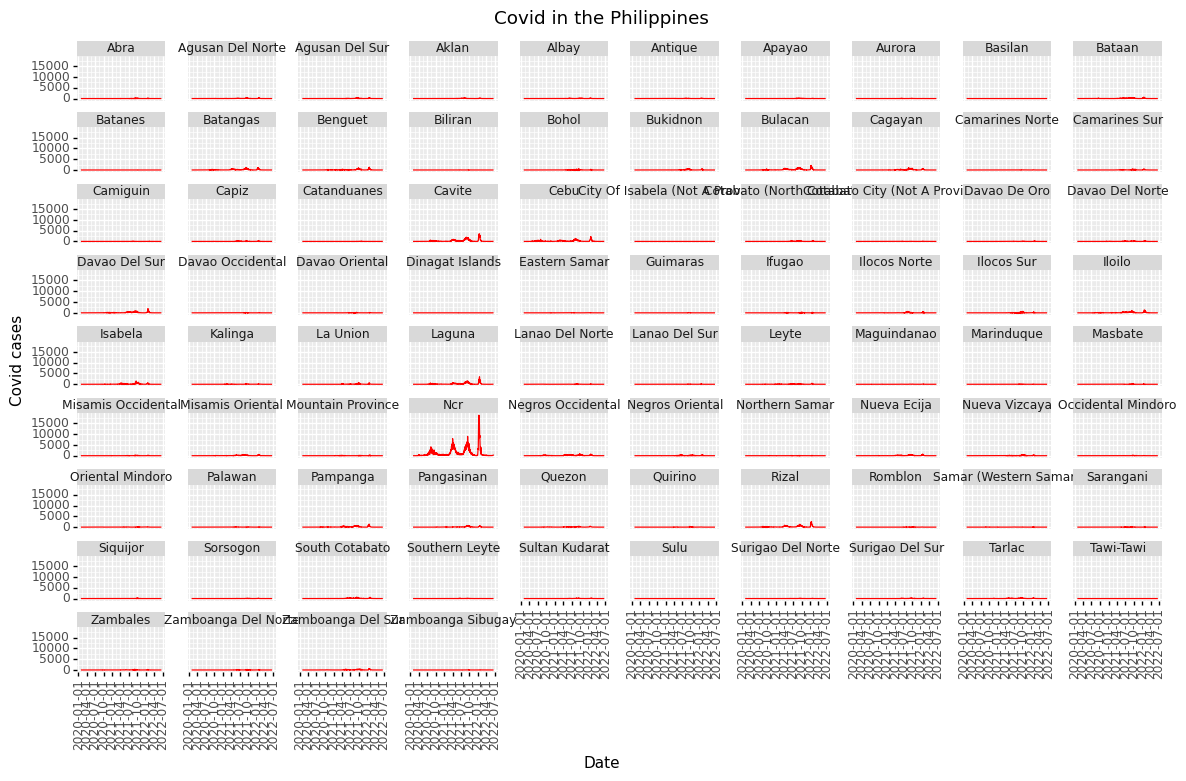

<ggplot: (323911542)>

In [27]:
#Plotnine chart
(
    ggplot(df_prov2, aes('DateRepConf', 'CaseCode')) +
           geom_line(color="red") +
           theme(figure_size=(14,8)) +
           facet_wrap('province') +
           theme(subplots_adjust={'wspace': 0.25}, axis_text_x=element_text(rotation=90)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)

# Track cases per day region

### Wide data 

Similar with provincial data. We have to go through this process to be able to extract **long data** since we would have to fill some null values.

In [28]:
df_reg = df.pivot_table(columns="RegionRes", index='DateRepConf', values='CaseCode', aggfunc='count', fill_value='0', dropna=False).reset_index()
df_reg.head(10)

RegionRes,DateRepConf,BARMM,CAR,CARAGA,NCR,ROF,Region I: Ilocos Region,Region II: Cagayan Valley,Region III: Central Luzon,Region IV-A: CALABARZON,Region IV-B: MIMAROPA,Region IX: Zamboanga Peninsula,Region V: Bicol Region,Region VI: Western Visayas,Region VII: Central Visayas,Region VIII: Eastern Visayas,Region X: Northern Mindanao,Region XI: Davao Region,Region XII: SOCCSKSARGEN
0,2020-01-30,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
1,2020-02-03,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
2,2020-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
3,2020-03-06,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0
4,2020-03-07,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0
5,2020-03-08,0,0,0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2020-03-09,0,0,0,11.0,1.0,0,0,1.0,1.0,0,0,0,0,0,0,0,0,0
7,2020-03-10,0,0,0,7.0,0,0,0,1.0,0,0,0,1.0,0,0,0,0,0,0
8,2020-03-11,0,0,0,13.0,1.0,0,0,0,1.0,0,0,0,0,1.0,0,0,0,0
9,2020-03-12,0,0,0,2.0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0


### Long data

We create a new data frame solely for regional data only for processing later with plotnine for charts.

In [29]:
df_reg2 = pd.melt(df_reg, id_vars=['DateRepConf'], value_name='CaseCode', var_name='province').sort_values('province')
df_reg2.CaseCode = df_reg2.CaseCode.astype(int)
df_reg2.reset_index(inplace=True)

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


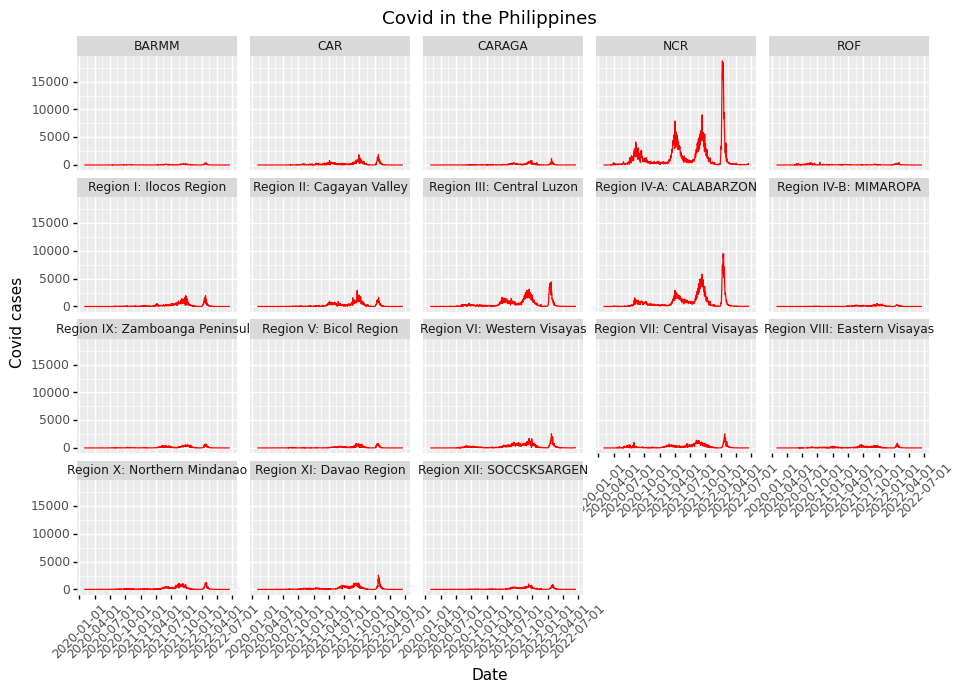

<ggplot: (361516462)>

In [30]:
plt=(
    ggplot(df_reg2, aes('DateRepConf', 'CaseCode')) +
           geom_line(color="red", stat="identity") +
           theme(figure_size=(11,7)) +
           facet_wrap('province') +
           theme(subplots_adjust={'wspace': 0.08}, axis_text_x=element_text(rotation=45)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)
plt
#ggsave(plt, "covid.svg")

# By municipality

This is quite heavy and would need some extensive data cleaning because of some municipalities with the same names. Remove the hashtags to run.

In [31]:
df_munc = df.CityMunRes.value_counts().sort_index()
df_munc = df.groupby("ProvRes").CityMunRes.value_counts().sort_index()
df_munc

ProvRes            CityMunRes       
Abra               Bangued (Capital)    1083
                   Boliney               196
                   Bucay                 317
                   Bucloc                111
                   Daguioman              86
                                        ... 
Zamboanga Sibugay  Roseller Lim          170
                   Siay                  427
                   Talusan                50
                   Titay                 468
                   Tungawan              257
Name: CityMunRes, Length: 1635, dtype: int64

# How is a location's infection tally through time (one loc at a time)?

Applicable for provinces, municipalities, regions.

In [32]:
#Example for region
df[df.RegionRes=="NCR"].resample('D', on='DateRepConf').CaseCode.count().tail(10)

DateRepConf
2022-06-09    125
2022-06-10    118
2022-06-11    153
2022-06-12    153
2022-06-13    186
2022-06-14    125
2022-06-15    116
2022-06-16    214
2022-06-17    282
2022-06-18    266
Freq: D, Name: CaseCode, dtype: int64

In [33]:
#Example for municipalities
df[df.CityMunRes=="Quezon City"].resample('D', on='DateRepConf').CaseCode.count().tail(10)

DateRepConf
2022-06-09    34
2022-06-10    32
2022-06-11    36
2022-06-12    36
2022-06-13    49
2022-06-14    17
2022-06-15    23
2022-06-16    43
2022-06-17    66
2022-06-18    68
Freq: D, Name: CaseCode, dtype: int64

<AxesSubplot:title={'center':'QC cases'}, xlabel='DateRepConf'>

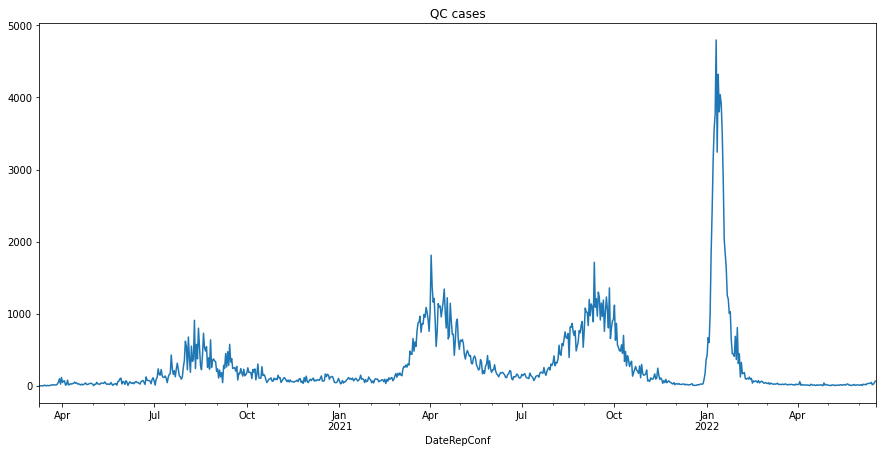

In [34]:
#Not plotnine but can be made one if made into a single df.
df[df.CityMunRes=="Quezon City"].resample('D', on='DateRepConf').CaseCode.count().plot(title="QC cases", figsize = (15, 7))

# How young/old are the infected?

In [35]:
df.AgeGroup.value_counts(normalize=True, dropna=False)*100
#0.1% of people infected did not indicate age.

25 to 29    14.495007
30 to 34    12.919263
20 to 24    10.210999
35 to 39     9.891516
40 to 44     8.377439
45 to 49     6.864661
50 to 54     6.300052
55 to 59     5.562834
60 to 64     4.415188
15 to 19     4.280273
65 to 69     3.311270
10 to 14     2.940942
70 to 74     2.412240
0 to 4       2.374412
5 to 9       2.305222
80+          1.797166
75 to 79     1.462881
NaN          0.078633
Name: AgeGroup, dtype: float64

# How many males and females? How many are admitted to hospital?

**normalize=True** will get you the percentage share.

In [36]:
df.Sex.value_counts(dropna=False, normalize=True) * 100
#Nearly equal number of females and males infected with Covid-19

FEMALE    51.005235
MALE      48.993601
NaN        0.001164
Name: Sex, dtype: float64

In [37]:
df.Admitted.value_counts(dropna=False)
#NaN means no answer

NaN    2299493
NO     1273311
YES     122848
Name: Admitted, dtype: int64

# Testing

We now go to testing data, which is contained in a separate CSV file from the DOH Data Drop. We read through the file first.

Notice again how there are **NaNs** in some rows. Some of them you can ignore because of the type of data (i.e. **daily_output_unique_individuals** where NaN essentially means there were no test conducted that day.

You can check whether they have a significant impact on the broader picture by running **isna** in certain columns or putting **dropna=False** in your **value_counts**.

Try this:
df[df.daily_output_unique_individuals.isna()]

In [39]:
df_test = pd.read_csv("DOH COVID Data Drop_ 20220618 - 07 Testing Aggregates.csv")
df_test

,facility_name,report_date,avg_turnaround_time,daily_output_samples_tested,daily_output_unique_individuals,daily_output_positive_individuals,daily_output_negative_individuals,daily_output_equivocal,daily_output_invalid,remaining_available_tests,backlogs,cumulative_samples_tested,cumulative_unique_individuals,cumulative_positive_individuals,cumulative_negative_individuals,pct_positive_cumulative,pct_negative_cumulative,validation_status
0,A Star Laboratories,2020-12-08,24.0,15.0,15.0,1.0,14.0,0.0,0.0,8.0,0.0,15,15,1,14,0.07,0.93,NaN
1,A Star Laboratories,2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
2,A Star Laboratories,2020-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
3,A Star Laboratories,2020-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
4,A Star Laboratories,2020-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178129,Zamboanga del Sur Medical Center PCR Laboratory,2022-06-13,48.0,5.0,5.0,0.0,5.0,0.0,0.0,21734.0,0.0,40718,40343,11426,28917,0.28,0.72,NaN
178130,Zamboanga del Sur Medical Center PCR Laboratory,2022-06-14,48.0,22.0,11.0,0.0,11.0,0.0,0.0,21713.0,0.0,40740,40354,11426,28928,0.28,0.72,NaN
178131,Zamboanga del Sur Medical Center PCR Laboratory,2022-06-15,48.0,27.0,27.0,0.0,27.0,0.0,0.0,21676.0,0.0,40767,40381,11426,28955,0.28,0.72,NaN
178132,Zamboanga del Sur Medical Center PCR Laboratory,2022-06-16,48.0,53.0,53.0,0.0,53.0,0.0,0.0,21613.0,0.0,40820,40434,11426,29008,0.28,0.72,NaN


# Transform dates to datetime format

In [40]:
df_test.report_date = pd.to_datetime(df_test.report_date, format="%Y-%m-%d", errors="coerce")

In [41]:
df_test

,facility_name,report_date,avg_turnaround_time,daily_output_samples_tested,daily_output_unique_individuals,daily_output_positive_individuals,daily_output_negative_individuals,daily_output_equivocal,daily_output_invalid,remaining_available_tests,backlogs,cumulative_samples_tested,cumulative_unique_individuals,cumulative_positive_individuals,cumulative_negative_individuals,pct_positive_cumulative,pct_negative_cumulative,validation_status
0,A Star Laboratories,2020-12-08,24.0,15.0,15.0,1.0,14.0,0.0,0.0,8.0,0.0,15,15,1,14,0.07,0.93,NaN
1,A Star Laboratories,2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
2,A Star Laboratories,2020-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
3,A Star Laboratories,2020-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
4,A Star Laboratories,2020-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178129,Zamboanga del Sur Medical Center PCR Laboratory,2022-06-13,48.0,5.0,5.0,0.0,5.0,0.0,0.0,21734.0,0.0,40718,40343,11426,28917,0.28,0.72,NaN
178130,Zamboanga del Sur Medical Center PCR Laboratory,2022-06-14,48.0,22.0,11.0,0.0,11.0,0.0,0.0,21713.0,0.0,40740,40354,11426,28928,0.28,0.72,NaN
178131,Zamboanga del Sur Medical Center PCR Laboratory,2022-06-15,48.0,27.0,27.0,0.0,27.0,0.0,0.0,21676.0,0.0,40767,40381,11426,28955,0.28,0.72,NaN
178132,Zamboanga del Sur Medical Center PCR Laboratory,2022-06-16,48.0,53.0,53.0,0.0,53.0,0.0,0.0,21613.0,0.0,40820,40434,11426,29008,0.28,0.72,NaN


# Look for null values

Again, nulls are not counted when resampling.

In [42]:
df_test.daily_output_unique_individuals.isna().value_counts()

False    164685
True      13449
Name: daily_output_unique_individuals, dtype: int64

**Interpretation**: Over 12,000 null values, meaning there was no information provided.

In [43]:
df_test.daily_output_samples_tested.isna().value_counts()
#Same with samples.

False    164683
True      13451
Name: daily_output_samples_tested, dtype: int64

# Total number of people tested for Covid-19 daily

In [44]:
#Creating a new data frame for processing with plotnine
daily_test = df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().to_frame().reset_index()
daily_test.tail(12)
#shows last 12 days.

,report_date,daily_output_unique_individuals
794,2022-06-06,17112.0
795,2022-06-07,19386.0
796,2022-06-08,18667.0
797,2022-06-09,19856.0
798,2022-06-10,18671.0
799,2022-06-11,17990.0
800,2022-06-12,13430.0
801,2022-06-13,18652.0
802,2022-06-14,20008.0
803,2022-06-15,19331.0


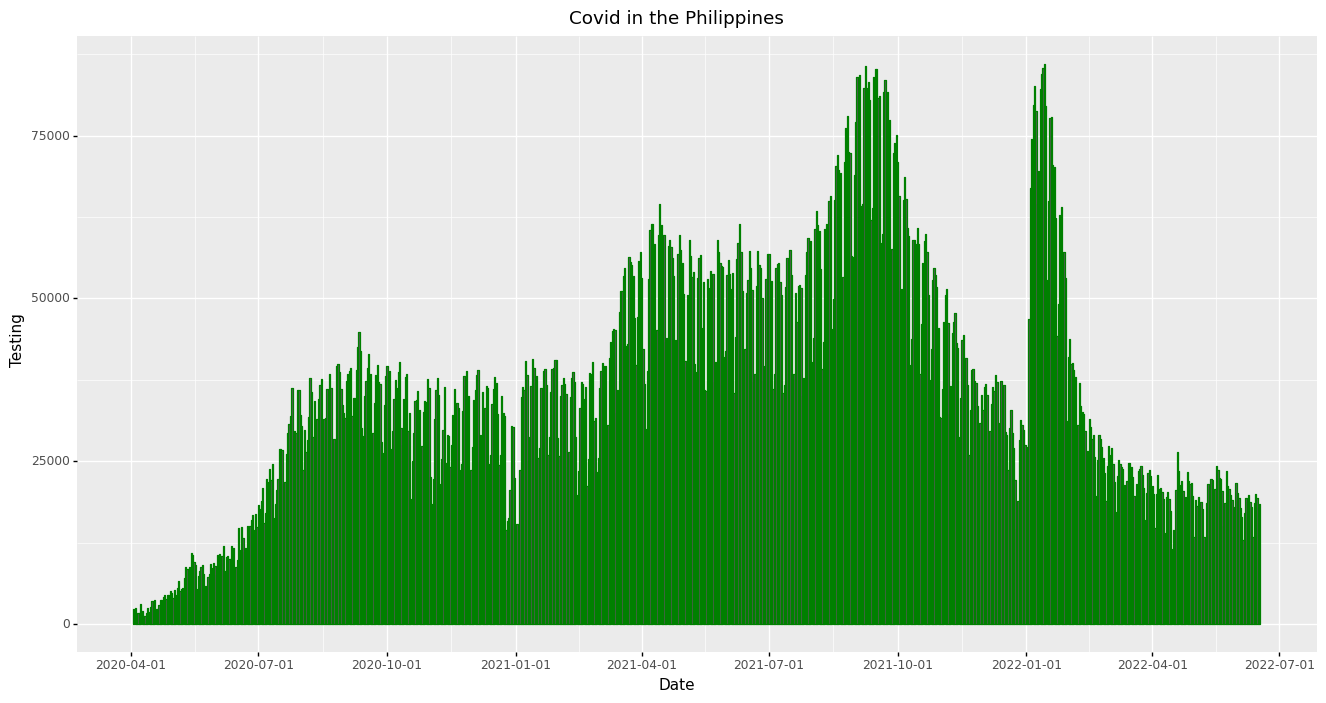

<ggplot: (313998261)>

In [45]:
#Plotnine chart
(
    ggplot(daily_test, aes('report_date', 'daily_output_unique_individuals')) +
           geom_col(color="green", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Testing", title="Covid in the Philippines")
)

Interpretation: Number of people getting tested for Covid-19 daily have gone down
from their September peak of about 80,000 during a surge. 

# Total samples tested each day

Number of samples may differ from number of individuals tested because some people undertake more than one test for confirmation.

Shows last 15 days.

In [46]:
df_test.resample('D', on='report_date').daily_output_samples_tested.sum().tail(15)

report_date
2022-06-03    21299.0
2022-06-04    17816.0
2022-06-05    13517.0
2022-06-06    17698.0
2022-06-07    20399.0
2022-06-08    19562.0
2022-06-09    20671.0
2022-06-10    19856.0
2022-06-11    18764.0
2022-06-12    13999.0
2022-06-13    19983.0
2022-06-14    21273.0
2022-06-15    20385.0
2022-06-16    18906.0
2022-06-17    19524.0
Freq: D, Name: daily_output_samples_tested, dtype: float64

# Two-week rolling average in testing

Shows last 10 days.

In [47]:
test_roll = df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().rolling(14).mean().round().to_frame().reset_index()
test_roll.tail(10)

,report_date,daily_output_unique_individuals
796,2022-06-08,18172.0
797,2022-06-09,18113.0
798,2022-06-10,18026.0
799,2022-06-11,17953.0
800,2022-06-12,17960.0
801,2022-06-13,18004.0
802,2022-06-14,17886.0
803,2022-06-15,17829.0
804,2022-06-16,17725.0
805,2022-06-17,17769.0


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 13 rows containing missing values.


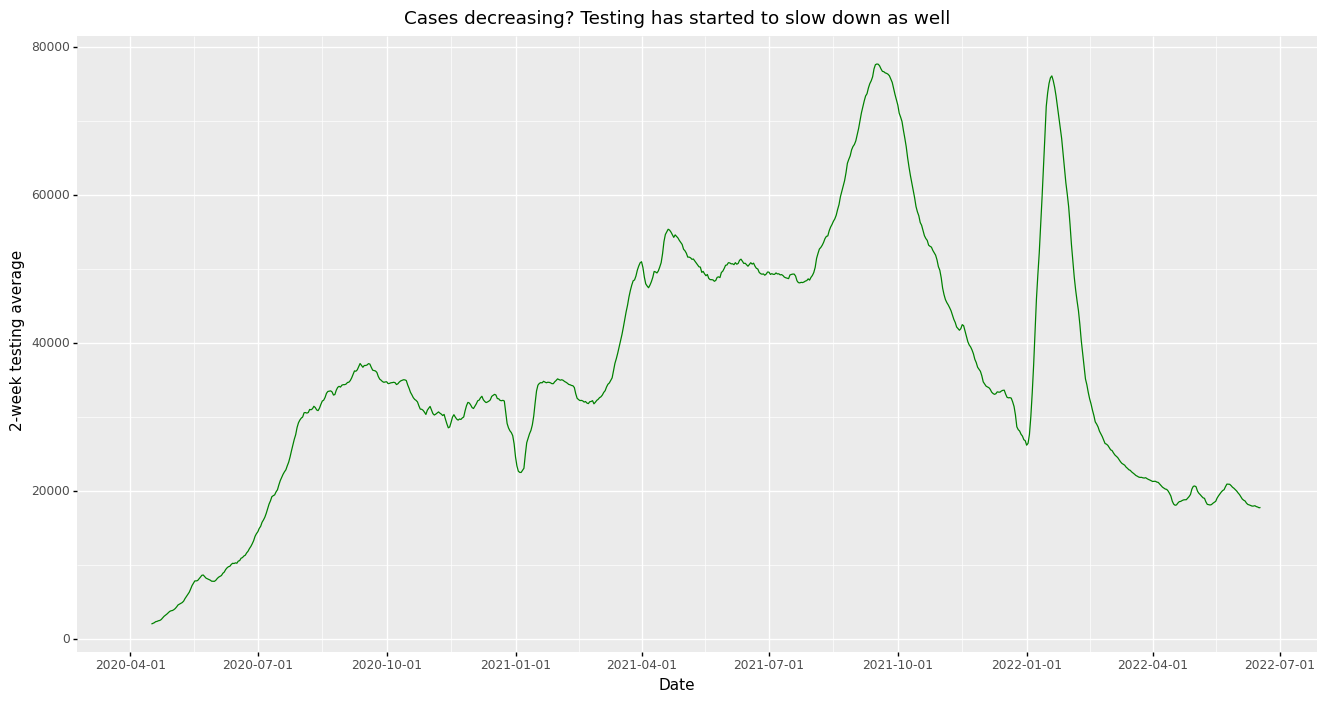

<ggplot: (304450963)>

In [48]:
(
    ggplot(test_roll, aes('report_date', 'daily_output_unique_individuals')) +
           geom_line(color="green", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="2-week testing average", title="Cases decreasing? Testing has started to slow down as well")
)

# How many people are tested each month?

### Monthly totals arranged from highest to lowest

Remove **sort_values(ascending=False)** to arrange it by date.

In [49]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().sort_values(ascending=False)

report_date
2021-09-30    2270631.0
2022-01-31    1965219.0
2021-08-31    1876508.0
2021-10-31    1674413.0
2021-04-30    1571601.0
2021-07-31    1534758.0
2021-05-31    1525650.0
2021-06-30    1509897.0
2021-03-31    1377946.0
2021-11-30    1160857.0
2020-09-30    1073189.0
2020-10-31    1027587.0
2020-08-31    1017208.0
2021-01-31    1014680.0
2021-12-31     944796.0
2020-12-31     929690.0
2021-02-28     907116.0
2020-11-30     894039.0
2022-02-28     833014.0
2020-07-31     768793.0
2022-03-31     695746.0
2022-05-31     596823.0
2022-04-30     584955.0
2020-06-30     360407.0
2022-06-30     306142.0
2020-05-31     232199.0
2020-04-30      81089.0
Name: daily_output_unique_individuals, dtype: float64

<AxesSubplot:title={'center':'Testing slumps below 100k in Dec 2021'}, xlabel='report_date'>

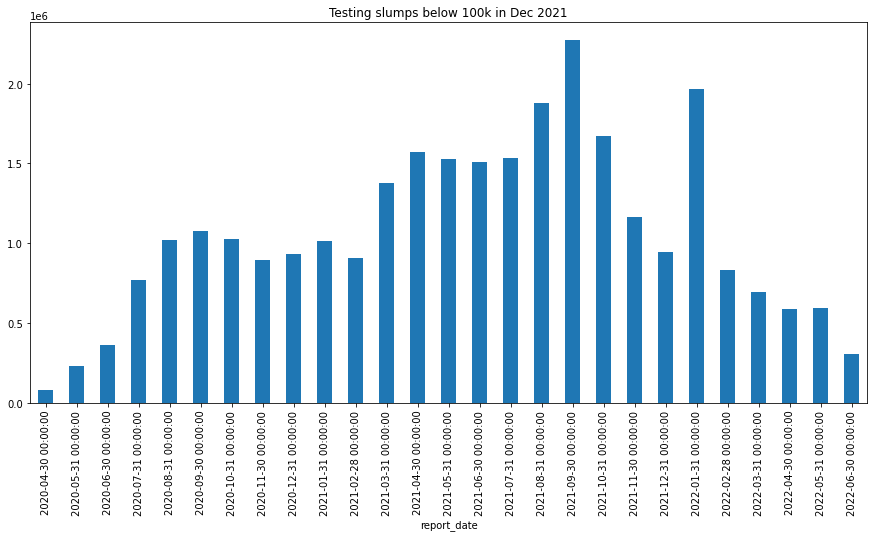

In [50]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().plot(kind="bar", title="Testing slumps below 100k in Dec 2021", figsize = (15, 7))


# Where do most positive individuals get tested?

Top 15

### Cumulative

In [51]:
df_test.groupby("facility_name").daily_output_positive_individuals.sum().sort_values(ascending=False).head(15)

facility_name
Detoxicare Molecular Diagnostics Laboratory                               181071.0
Philippine Red Cross - Port Area                                          177103.0
Philippine Red Cross (PRC)                                                101398.0
Baguio General Hospital and Medical Center                                 87589.0
Research Institute for Tropical Medicine (RITM)                            78076.0
Jose B. Lingad Memorial General Hospital                                   73307.0
Philippine Red Cross Logistics & Multipurpose Center                       73084.0
Chinese General Hospital                                                   70609.0
Cebu TB Reference Laboratory - Molecular Facility for COVID-19 Testing     65598.0
Southern Philippines Medical Center (SPMC)                                 62858.0
Cagayan Valley Medical Center Molecular Laboratory                         62390.0
Ilocos Training and Regional Medical Center                              

### Monthly 

Ranked from highest to lowest number of tests.

In [52]:
df_test.groupby("facility_name").resample('M', on='report_date').daily_output_positive_individuals.sum().sort_values(ascending=False).head(15)


facility_name                                   report_date
Detoxicare Molecular Diagnostics Laboratory     2022-01-31     35108.0
Philippine Red Cross - Port Area                2021-09-30     27547.0
                                                2022-01-31     26081.0
                                                2021-08-31     23943.0
Detoxicare Molecular Diagnostics Laboratory     2021-09-30     21316.0
Philippine Red Cross - Port Area                2021-04-30     20038.0
Detoxicare Molecular Diagnostics Laboratory     2021-04-30     18665.0
The Lord's Grace Medical and Industrial Clinic  2022-01-31     18634.0
Philippine Red Cross (PRC)                      2021-09-30     18480.0
Ilocos Training and Regional Medical Center     2021-09-30     17270.0
Philippine Airport Diagnostic Laboratory        2022-01-31     15908.0
Baguio General Hospital and Medical Center      2021-09-30     15865.0
Philippine Red Cross - Port Area                2021-03-31     15852.0
Detoxicare Molecu

### Per testing site per month

Just change the name of the testing site after **df2.facility_name** to check other facilities.
Data show total monthly tests conducted per each facility.

Make it per day by just changing **'M'** in **resample** to **'D'**.

In [53]:
df_test[df_test.facility_name=="Philippine Red Cross - Port Area"].resample('M', on='report_date').daily_output_positive_individuals.sum()


report_date
2020-05-31      205.0
2020-06-30      482.0
2020-07-31     7488.0
2020-08-31    10269.0
2020-09-30     8200.0
2020-10-31     1880.0
2020-11-30     2090.0
2020-12-31     2090.0
2021-01-31     1585.0
2021-02-28     3189.0
2021-03-31    15852.0
2021-04-30    20038.0
2021-05-31     8407.0
2021-06-30     4556.0
2021-07-31     5584.0
2021-08-31    23943.0
2021-09-30    27547.0
2021-10-31     4570.0
2021-11-30     1031.0
2021-12-31     1158.0
2022-01-31    26081.0
2022-02-28      596.0
2022-03-31      103.0
2022-04-30       25.0
2022-05-31       37.0
2022-06-30       97.0
Freq: M, Name: daily_output_positive_individuals, dtype: float64

# How many individuals test positive every day?

In [54]:
df_test.resample('D', on='report_date').daily_output_positive_individuals.sum().tail(15)

report_date
2022-06-03    232.0
2022-06-04    212.0
2022-06-05    229.0
2022-06-06    258.0
2022-06-07    309.0
2022-06-08    373.0
2022-06-09    384.0
2022-06-10    410.0
2022-06-11    401.0
2022-06-12    311.0
2022-06-13    551.0
2022-06-14    508.0
2022-06-15    688.0
2022-06-16    585.0
2022-06-17    632.0
Freq: D, Name: daily_output_positive_individuals, dtype: float64

# Turnaround time

The number of people that test positive each day does not match cases reported each day. And it's partly because of delays in testing results. Hence some results reported today could be from tests days ago. What's the average turnaround time in hours for tests?

In [55]:
df_test.avg_turnaround_time.value_counts().head(3)

48.0    48865
24.0    47230
72.0     9566
Name: avg_turnaround_time, dtype: int64

# Positivity rate

Computed by dividing the number of positive tests out of the total tests conducted each day. The World Health Organization considers 5% and below positivity rate as the virus spread being under control.

### Daily

We make a new dataframe for positivity rate for faster processing of data in succeeding analysis.
(Also, it throws an error merely putting **.plot()** at this code so making a new df for this solve that problem.
Below we only show the positivity rate for the last 30 days.

In [56]:
#Creating a new df to process in plotnine
df_pos = df_test.resample('D', on='report_date').daily_output_positive_individuals.sum() / df_test.resample('D', on='report_date').daily_output_unique_individuals.sum() * 100
df_pos2 = df_pos.to_frame().reset_index()

#Renaming the columns because one of them is '0'
df_pos2.columns = ['date', 'testing']
df_pos2.tail(10)


,date,testing
796,2022-06-08,1.998179
797,2022-06-09,1.933924
798,2022-06-10,2.195919
799,2022-06-11,2.229016
800,2022-06-12,2.315711
801,2022-06-13,2.954107
802,2022-06-14,2.538984
803,2022-06-15,3.559050
804,2022-06-16,3.269800
805,2022-06-17,3.414186


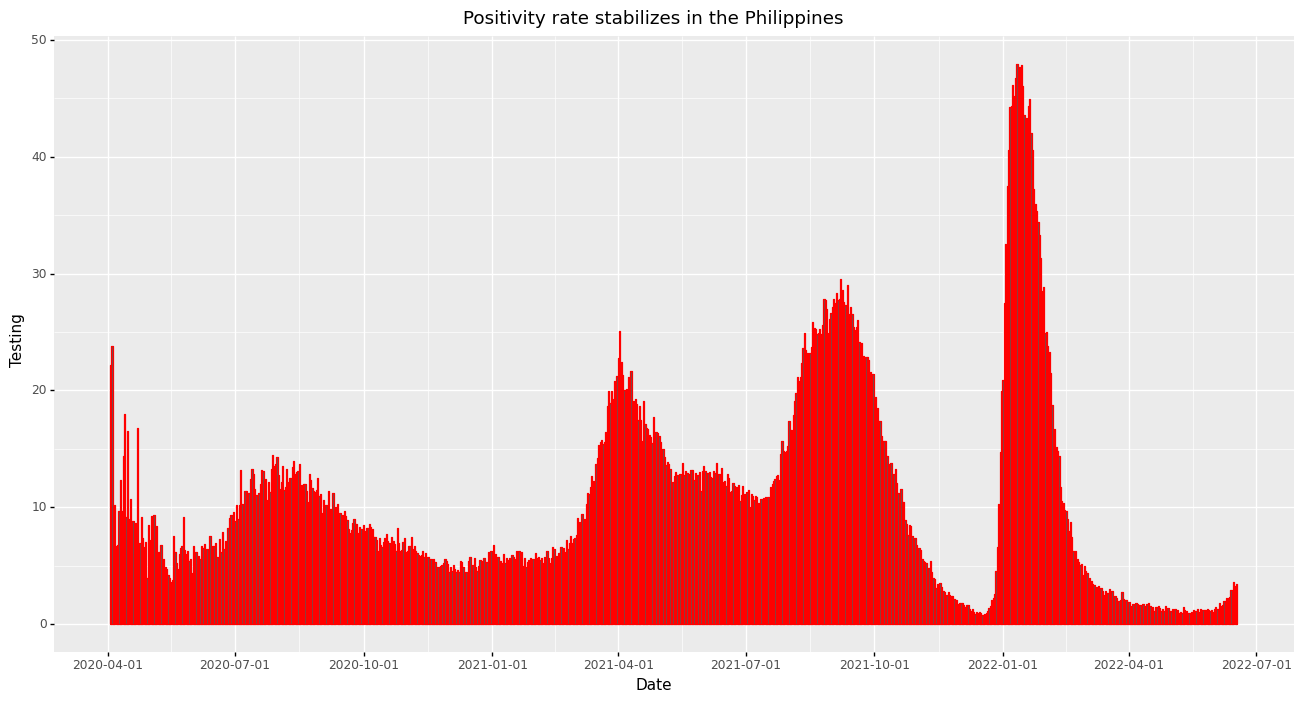

<ggplot: (362521414)>

In [57]:
(
    ggplot(df_pos2, aes('date', 'testing')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Testing", title="Positivity rate stabilizes in the Philippines")
)

# Save to CSVs

Just remove the hashtags!

While your testing data is in one CSV, cases are not. So now, you have the option to save it into one CSV. Note that you do not need to do this if you're using the dataframes (df) you generated above to process the data in Jupyter Notebook anytime.

### Entire case file from DOH

In [ ]:
#df.to_csv("covidcases.csv", index=False)
#pd.read_csv("covidcases.csv")

### Provincial cases per day

In [ ]:
#df_prov.to_csv("covid_prov.csv")
#pd.read_csv("covid_prov.csv")

### Municipal cases total

In [ ]:
#df_munc.to_csv("covid_munc.csv")
#pd.read_csv("covid_munc.csv")